In [1]:
#Problem Statement

#Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute.
#Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution
#through a user-friendly mobile app to enable shared, solo and sustainable commuting.

#Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc)
#to make those first and last miles smooth, affordable, and convenient!

#Yulu has recently suffered considerable dips in its revenues. 
#They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends.
#Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [2]:
#Importing all important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway,chi2_contingency,norm

In [3]:
#Reading data
df=pd.read_csv("bike_sharing.csv")

In [4]:
#Checking how data looks like
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
#Checking Size of data
df.shape

(10886, 12)

In [6]:
#Checking data types of columns
df.info()

#Insights: dateime coulumn has object data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
#Checking null counts
df.isna().sum()

#Insights: No Null Values found in records

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
#Null values not found but there can be missing values
df1=pd.read_csv("bike_sharing.csv")
df1["datetime"]=pd.to_datetime(df1["datetime"])
df1["datetime"]=df1["datetime"].dt.time
df1["datetime"].value_counts()

#Insights:
#Total 456 days data we have but for few time frames no of readings are less than 456
#missing data is very less so we can go ahead with original data

12:00:00    456
13:00:00    456
22:00:00    456
21:00:00    456
20:00:00    456
19:00:00    456
18:00:00    456
17:00:00    456
16:00:00    456
15:00:00    456
14:00:00    456
23:00:00    456
11:00:00    455
10:00:00    455
09:00:00    455
08:00:00    455
07:00:00    455
06:00:00    455
00:00:00    455
01:00:00    454
05:00:00    452
02:00:00    448
04:00:00    442
03:00:00    433
Name: datetime, dtype: int64

In [9]:
#Stastistical oveview of data
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
#unique attributes
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [11]:
#Finding out categorical variables
print("Different types of Seasons = ",df["season"].unique())
print("Different types of Workingday = ",df["workingday"].unique())
print("Different types of Weather = ",df["weather"].unique())

#Insights
#there are 4 types of seasons,     1:Spring 2:Summer 3:Fall 4:Winter

#there are 2 types of working day, 0:Not a working day 1:working day 

#there are 4 types of weather:     1: Clear, Few clouds, partly cloudy, partly cloudy
#                                  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#                                  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#                                  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Different types of Seasons =  [1 2 3 4]
Different types of Workingday =  [0 1]
Different types of Weather =  [1 2 3 4]


In [12]:
#Converting continuous variables to categorical variables
df["humidity_bins"]=pd.cut(df["humidity"],5)
df["temp_bins"]=pd.cut(df["temp"],3)
df["windspeed_bins"]=pd.cut(df["windspeed"],6)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,humidity_bins,temp_bins,windspeed_bins
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"(80.0, 100.0]","(0.78, 14.213]","(-0.057, 9.499]"
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"(60.0, 80.0]","(0.78, 14.213]","(-0.057, 9.499]"
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"(60.0, 80.0]","(0.78, 14.213]","(-0.057, 9.499]"
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,"(60.0, 80.0]","(0.78, 14.213]","(-0.057, 9.499]"
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,"(60.0, 80.0]","(0.78, 14.213]","(-0.057, 9.499]"


In [13]:
#to do analysis on working days and season, we need day wise data
#step1: converting datetime column into only date 
df["datetime"]=pd.to_datetime(df["datetime"])
df["datetime"]=df["datetime"].dt.date
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,humidity_bins,temp_bins,windspeed_bins
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"(80.0, 100.0]","(0.78, 14.213]","(-0.057, 9.499]"
1,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"(60.0, 80.0]","(0.78, 14.213]","(-0.057, 9.499]"
2,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"(60.0, 80.0]","(0.78, 14.213]","(-0.057, 9.499]"
3,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,3,10,13,"(60.0, 80.0]","(0.78, 14.213]","(-0.057, 9.499]"
4,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,0,1,1,"(60.0, 80.0]","(0.78, 14.213]","(-0.057, 9.499]"


In [14]:
#Checking how many days data we have
df.groupby("datetime").ngroups

#Insights
#we have total 456 days of data

456

In [15]:
#grouping data
df_new=df.groupby(["datetime","season","workingday"])["count"].sum().reset_index()
df_new.head()

,datetime,season,workingday,count
0,2011-01-01,1,0,985
1,2011-01-02,1,0,801
2,2011-01-03,1,1,1349
3,2011-01-04,1,1,1562
4,2011-01-05,1,1,1600


In [16]:
#Stastistical overview for new data
df_new.describe()

#Insights
#Count of total rental bikes per day. Mean and median dont have much difference (4573 and 4585 respectively)

,season,workingday,count
count,456.000000,456.000000,456.000000
mean,2.500000,0.682018,4573.412281
std,1.119262,0.466204,1868.740135
min,1.000000,0.000000,605.000000
25%,1.750000,0.000000,3305.500000
50%,2.500000,1.000000,4585.500000
75%,3.250000,1.000000,5987.500000
max,4.000000,1.000000,8714.000000


Text(0.5, 1.0, 'Hour wise Data')

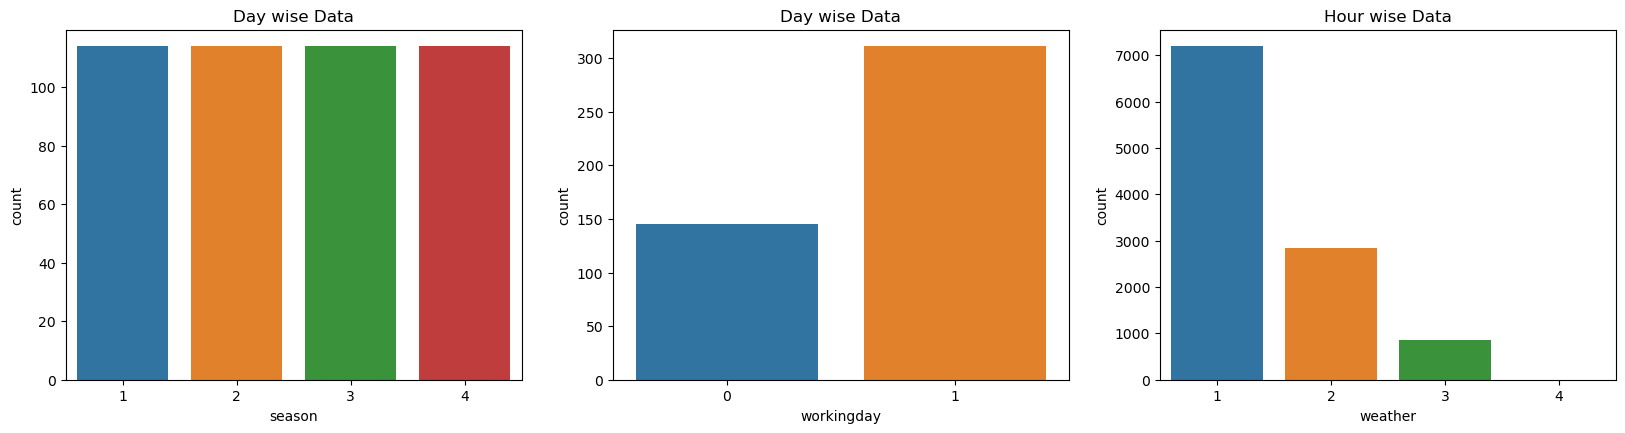

In [17]:
#Graphocal Analysis
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(data=df_new, x="season")
plt.title("Day wise Data")
plt.subplot(2,3,2)
sns.countplot(data=df_new, x="workingday")
plt.title("Day wise Data")
plt.subplot(2,3,3)
sns.countplot(data=df, x="weather")
plt.title("Hour wise Data")

humidity_bins,"(-0.1, 20.0]","(20.0, 40.0]","(40.0, 60.0]","(60.0, 80.0]","(80.0, 100.0]"
count,14070,453412,786017,579255,252722


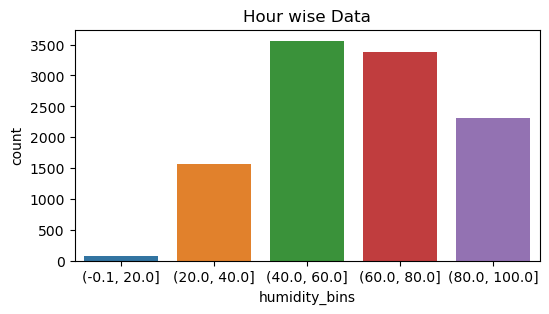

In [18]:
#humidity in city-hourly count and how much bikes rented     
plt.figure(figsize=(6,3))
sns.countplot(data=df,x="humidity_bins")
plt.title("Hour wise Data")
humidity_wise_count=pd.DataFrame(df.groupby("humidity_bins")["count"].sum()).T
humidity_wise_count

#Figure show humidity distribution 
#chart shows usage of bikes

In [19]:
df["humidity_bins"].value_counts()

(40.0, 60.0]     3564
(60.0, 80.0]     3382
(80.0, 100.0]    2302
(20.0, 40.0]     1560
(-0.1, 20.0]       78
Name: humidity_bins, dtype: int64

In [20]:
#insights
#Mostly humidity in city stays more than 40
#lets compare bikes rented per hours for humidity bins of 40-60, 60-80 and 80-100
#No of bikes/no of hours
print("Rented Bikes/hour for humidity between 40 and 60 =",786017//3564)
print("Rented Bikes/hour for humidity between 60 and 80 =",579255//3382)
print("Rented Bikes/hour for humidity between 80 and 100 =",252722//2302)

#insights: 40-60 hymidity is perfect weather for bike rental. as humidity increases less people prefer bikes

Rented Bikes/hour for humidity between 40 and 60 = 220
Rented Bikes/hour for humidity between 60 and 80 = 171
Rented Bikes/hour for humidity between 80 and 100 = 109


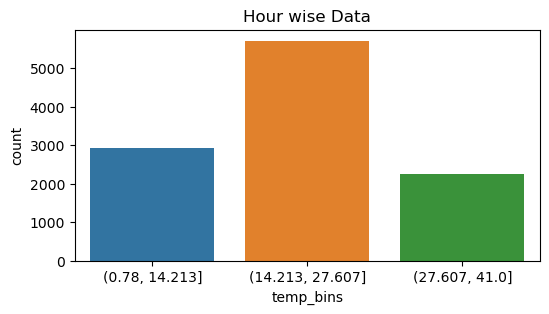

temp_bins,"(0.78, 14.213]","(14.213, 27.607]","(27.607, 41.0]"
count,301965,1114051,669460


In [21]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x="temp_bins")
plt.title("Hour wise Data")
plt.show()
temp_wise_count=pd.DataFrame(df.groupby("temp_bins")["count"].sum()).T
temp_wise_count

#Figure show temperature distribution 
#chart shows usage of bikes

In [22]:
df["temp_bins"].value_counts()

(14.213, 27.607]    5712
(0.78, 14.213]      2926
(27.607, 41.0]      2248
Name: temp_bins, dtype: int64

In [23]:
#insights
#Mostly temperature in city stays between 14 and 27
#lets compare bikes rented per hours for temperature bins 
#No of bikes/no of hours
print("Rented Bikes/hour for temperature upto 14 =",301965//2926)
print("Rented Bikes/hour for temperature between 14 and 27 =",1114051//2926)
print("Rented Bikes/hour for temperature above 27=",669460//2248)

#insights: Ideal temp when people prefer bike is betwenn 14 and 27
#less people prefer bikes when its cold outside

Rented Bikes/hour for temperature upto 14 = 103
Rented Bikes/hour for temperature between 14 and 27 = 380
Rented Bikes/hour for temperature above 27= 297


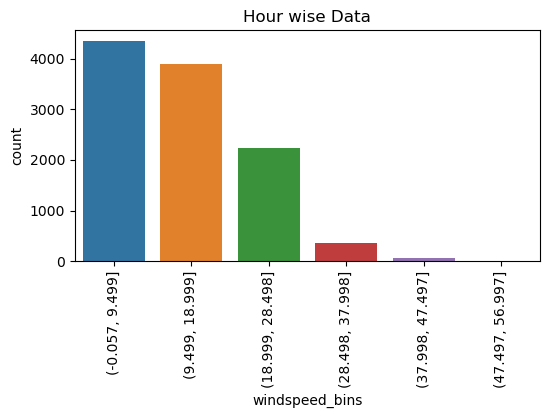

windspeed_bins,"(-0.057, 9.499]","(9.499, 18.999]","(18.999, 28.498]","(28.498, 37.998]","(37.998, 47.497]","(47.497, 56.997]"
count,712814,804180,482118,75113,10255,996


In [24]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x="windspeed_bins")
plt.title("Hour wise Data")
plt.xticks(rotation=90)
plt.show()
windspeed_wise_count=pd.DataFrame(df.groupby("windspeed_bins")["count"].sum()).T
windspeed_wise_count


#Figure show windspeed distribution 
#chart shows usage of bikes

In [25]:
df["windspeed_bins"].value_counts()

(-0.057, 9.499]     4339
(9.499, 18.999]     3884
(18.999, 28.498]    2236
(28.498, 37.998]     360
(37.998, 47.497]      61
(47.497, 56.997]       6
Name: windspeed_bins, dtype: int64

In [26]:
#insights
#Mostly Windspeed in city stays from 0-28.5
#lets compare bikes rented per hours for Windspeed bins 0-9.5, 9.5-19 and 19-28.5
#No of bikes/no of hours
print("Rented Bikes/hour for Windspeed upto 9.5 =",712814//4339)
print("Rented Bikes/hour for Windspeed between 9.5 and 19 =",804180//3884)
print("Rented Bikes/hour for Windspeed between 19 and 28.5=",482118//2236)

#insights: when windpeed is less than 9.5, comparitively less people rent bike

Rented Bikes/hour for Windspeed upto 9.5 = 164
Rented Bikes/hour for Windspeed between 9.5 and 19 = 207
Rented Bikes/hour for Windspeed between 19 and 28.5= 215


In [27]:
print("casual users demand/hour=",df["casual"].sum()//len(df["casual"]))
print("registered users demand/hour=",df["registered"].sum()//len(df["registered"]))

#insights
#registred user demand is more than casual

casual users demand/hour= 36
registered users demand/hour= 155


<AxesSubplot:xlabel='workingday', ylabel='count'>

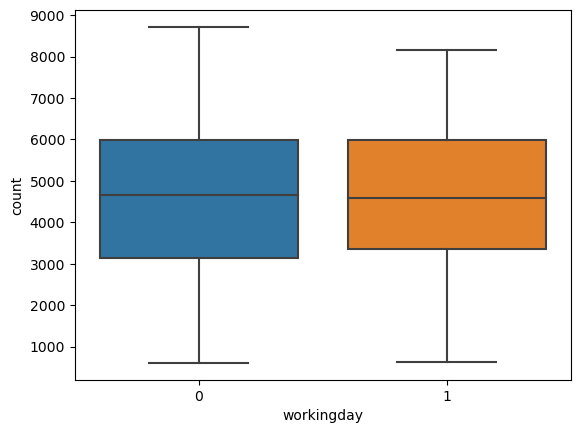

In [28]:
#Bivariate Analysis between No of vehicles and working day/non working day
sns.boxplot(data=df_new,x="workingday",y="count")

#Insights
#We can see there is not much difference in medians of both groups
#but based on above information we cant conclude no effect on No of vehicles rented if working or non working day
#we need to do 2t t test to check stastistically

In [29]:
#segregating samples for working day and non working day
df_workingday=df_new[df_new["workingday"]==1]
df_non_workingday=df_new[df_new["workingday"]==0]

In [30]:
#basic info about samples
print("Basic Stats about working Days data")
print("Mean for no of bikes rented on working days =",round(df_workingday["count"].mean()))
print("Std Deviation for no of bikes rented on working days =",round(df_workingday["count"].std()))
print("Total no of working days =",len(df_workingday))
print("")
print("Basic Stats about non working Days data")
print("Mean for no of bikes rented on non working days =",round(df_non_workingday["count"].mean()))
print("Std Deviation for no of bikes rented on non working days =",round(df_non_workingday["count"].std()))
print("Total no of non working days =",len(df_non_workingday))

Basic Stats about working Days data
Mean for no of bikes rented on working days = 4600
Std Deviation for no of bikes rented on working days = 1829
Total no of working days = 311

Basic Stats about non working Days data
Mean for no of bikes rented on non working days = 4516
Std Deviation for no of bikes rented on non working days = 1956
Total no of non working days = 145


In [31]:
#Checking if there is any effect on number of bikes rented based on if its working day or non working day

#Data we have: sample data
#Data we dont have: Population data
#As we dont have Population std deviation, we cant use Z test. 2 sample t test can be used in this case
#Sample size is more than 30 so t test will give similar results like z test

#Null Hypothesis: There is no effect of working days on No of bikes rented
#Alternate Hypothesis: No of bikes rented depends on if its a working day or not

#Test statistics: No of bikes rented per day
#Samples whoich we gonna use: df_workingday["counts"] and df_non_workingday["count"]
#significance level: 0.05

In [32]:
#performing T test and getting t stat and p value
t_stat_workingday,p_workingday=ttest_ind(df_non_workingday["count"],df_workingday["count"])
print("tstat=",t_stat_workingday)
print("p=",p_workingday)

tstat= -0.44477221614881995
p= 0.656696335987859


In [33]:
#Concluding 2 sample T test
if p_workingday<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

fail to reject null hypothesis


In [34]:
#insights
#There is No EFFECT if day is working or not on no of bikes rented

<AxesSubplot:xlabel='season', ylabel='count'>

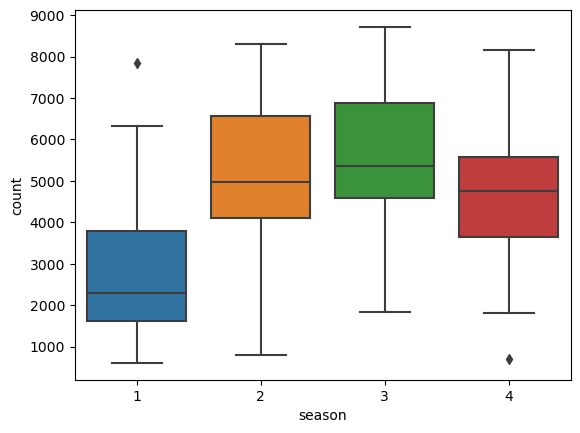

In [35]:
#Bivariate Analysis between No of vehicles and working day/non working day
sns.boxplot(data=df_new,x="season",y="count")


In [36]:
#segregating samples of different seasons
df_season1=df_new[df_new["season"]==1]
df_season2=df_new[df_new["season"]==2]
df_season3=df_new[df_new["season"]==3]
df_season4=df_new[df_new["season"]==4]

In [37]:
#basic info about samples
print("Basic Stats about season1 data")
print("Mean for no of bikes rented on season1 =",round(df_season1["count"].mean()))
print("Std Deviation for no of bikes rented on season1 days =",round(df_season1["count"].std()))
print("Total no of season1 days =",len(df_season1))
print("")
print("Basic Stats about season2 data")
print("Mean for no of bikes rented on season2 =",round(df_season2["count"].mean()))
print("Std Deviation for no of bikes rented on season2 days =",round(df_season2["count"].std()))
print("Total no of season2 days =",len(df_season2))
print("")
print("Basic Stats about season3 data")
print("Mean for no of bikes rented on season3 =",round(df_season3["count"].mean()))
print("Std Deviation for no of bikes rented on season3 days =",round(df_season3["count"].std()))
print("Total no of season3 days =",len(df_season3))
print("")
print("Basic Stats about season4 data")
print("Mean for no of bikes rented on season4 =",round(df_season4["count"].mean()))
print("Std Deviation for no of bikes rented on season4 days =",round(df_season4["count"].std()))
print("Total no of season4 days =",len(df_season4))
print("")

Basic Stats about season1 data
Mean for no of bikes rented on season1 = 2741
Std Deviation for no of bikes rented on season1 days = 1458
Total no of season1 days = 114

Basic Stats about season2 data
Mean for no of bikes rented on season2 = 5160
Std Deviation for no of bikes rented on season2 days = 1684
Total no of season2 days = 114

Basic Stats about season3 data
Mean for no of bikes rented on season3 = 5620
Std Deviation for no of bikes rented on season3 days = 1433
Total no of season3 days = 114

Basic Stats about season4 data
Mean for no of bikes rented on season4 = 4772
Std Deviation for no of bikes rented on season4 days = 1472
Total no of season4 days = 114



In [38]:
#Checking if there is any effect on number of bikes rented based on season
#Here we have 4 seasons. we need to check if no of bikes rented samples are statistically different for all 4 seasons
#here we are gonna compare more than 2 samples so Anova can be used

#Null Hypothesis: No of vehicles rented in all 4 seasons are same
#Alternate Hypothesis: No of vehicles rented in atleast 1 season is different than others

#Ftest is right tailed distribution which will tell us if samples are statistically significant or not by comparing p and alpha
#significance level: 0.05


In [39]:
#performing Anova and getting f ratio and p values
f_ratio_season,p_season=f_oneway(df_season1["count"],df_season2["count"],df_season3["count"],df_season4["count"])

print("F-Ratio=",f_ratio_season)
print("P=",p_season)

F-Ratio= 80.0504789788067
P= 1.506580502991204e-41


In [40]:
#Concluding Anova
if p_season<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

reject null hypothesis


In [41]:
#Insights
#we are rejecting null hypothesis that all samples are same
#Number of bikes rented depends on season

In [42]:
#for working days and season, data we used was per day
#weather may change during day,so will be using hour data to do statistical analysis of how weather influence No of bikes rented

<AxesSubplot:xlabel='weather', ylabel='count'>

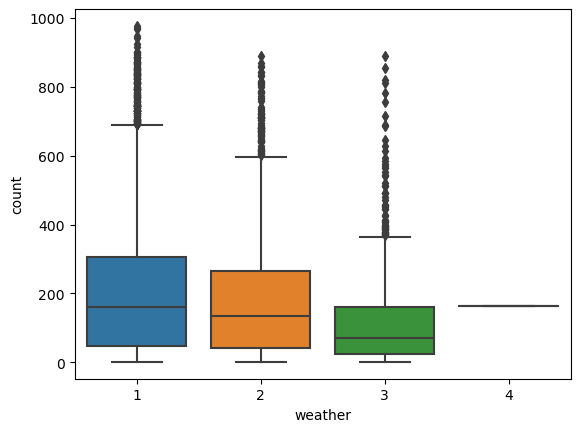

In [43]:
#Bivariate Analysis between No of vehicles and weather
sns.boxplot(data=df,x="weather",y="count")

#insights
#from graphs we can see there is difference in medians for no of bikes rented for all weathers
#we can also see outliers which are on higher side, will be ignoring for this analysis
#sample 4 data looks abnormal, will be investigating it

In [44]:
#segregating samples of different weathers
df_weather1=df[df["weather"]==1]
df_weather2=df[df["weather"]==2]
df_weather3=df[df["weather"]==3]
df_weather4=df[df["weather"]==4]

In [45]:
#basic info about samples
print("Basic Stats about weather1 data")
print("Mean for no of bikes rented on weather1 =",round(df_weather1["count"].mean()))
print("Std Deviation for no of bikes rented on weather1=",round(df_weather1["count"].std()))
print("Total no of weather1 hours =",len(df_weather1))
print("")
print("Basic Stats about weather2 data")
print("Mean for no of bikes rented on weather2 =",round(df_weather2["count"].mean()))
print("Std Deviation for no of bikes rented on weather2=",round(df_weather2["count"].std()))
print("Total no of weather2 hours =",len(df_weather2))
print("")
print("Basic Stats about weather3 data")
print("Mean for no of bikes rented on weather3 =",round(df_weather3["count"].mean()))
print("Std Deviation for no of bikes rented on weather3=",round(df_weather3["count"].std()))
print("Total no of weather3 hours =",len(df_weather3))
print("")
print("Basic Stats about weather4 data")
print("Mean for no of bikes rented on weather4 =",round(df_weather4["count"].mean()))
print("Total no of weather4 hours =",len(df_weather4))

Basic Stats about weather1 data
Mean for no of bikes rented on weather1 = 205
Std Deviation for no of bikes rented on weather1= 188
Total no of weather1 hours = 7192

Basic Stats about weather2 data
Mean for no of bikes rented on weather2 = 179
Std Deviation for no of bikes rented on weather2= 168
Total no of weather2 hours = 2834

Basic Stats about weather3 data
Mean for no of bikes rented on weather3 = 119
Std Deviation for no of bikes rented on weather3= 139
Total no of weather3 hours = 859

Basic Stats about weather4 data
Mean for no of bikes rented on weather4 = 164
Total no of weather4 hours = 1


In [46]:
#Checking if there is any effect on number of bikes rented based on weather
#Here we have 4 weather. we need to check if no of bikes rented samples are statistically different for all 4 weather
#here we are gonna compare more than 2 samples so Anova can be used

#Null Hypothesis: No of vehicles rented in all 4 weather are same
#Alternate Hypothesis: No of vehicles rented in atleast 1 weather is different than others

#Ftest is right tailed distribution which will tell us if samples are statistically significant or not by comparing p and alpha
#significance level: 0.05


In [47]:
#performing Anova and getting f ratio and p values
f_ratio_weather,p_weather=f_oneway(df_weather1["count"],df_weather2["count"],df_weather3["count"],df_weather4["count"])

print("F-Ratio=",f_ratio_weather)
print("P=",p_weather)

F-Ratio= 65.53024112793271
P= 5.482069475935669e-42


In [48]:
#Concluding Anova
if p_weather<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

reject null hypothesis


In [49]:
#Insights
#we are rejecting null hypothesis that all samples are same
#Number of bikes rented depends on weather

<AxesSubplot:xlabel='season', ylabel='count'>

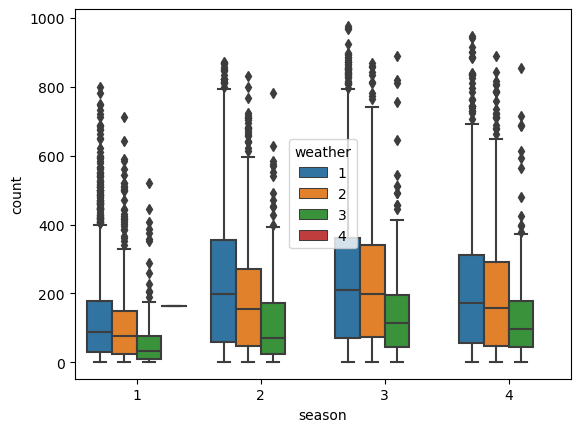

In [50]:
#Bivariate Analysis between No of vehicles with weather and season

sns.boxplot(data=df, x="season", y="count", hue="weather")

In [51]:
#season and weather both are categorical variables 
#from diagram we can see there is some relation between by comparing medians
#to check stastistically we need to perfoem chi-square test
chi2_data=pd.crosstab(index=df["season"],columns=df["weather"])
chi2_data

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [52]:
#Chi-square test
#Null Hypothesis: Season and weather does not depend on each other
#Alternate Hypothesis: Season and weather depends on each other
#significance level=0.05
tstat_cat,P_cat,df_cat,exp=chi2_contingency(chi2_data)
print("tstat=",tstat_cat)
print("P=",P_cat)

tstat= 49.158655596893624
P= 1.549925073686492e-07


In [53]:
#Concluding Anova
if P_cat<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

reject null hypothesis


In [54]:
#insights
#we fail to reject null hypothesis
#weather and season are dependednt on each other

In [55]:
#Collective insights

#we have hourly data for 456 days
#Overall count if we see then not much difference between mean and median of no of rental bikes.

#40-60 humidity is perfect weather for bike rental. As humidity increases less people prefer bikes.
#Ideal temp when people prefer bike is betwenn 14 and 27. less people prefer bikes when its cold outside
#When windspeed is less than 9.5, comparitively less people rent bike

#Registred user demand is more than casual
#number of vehicles rented is not influenced by if its working day or not working day

#number of vehicles rented is influenced by seasons
#season3 (fall) has highest demand
#season1 (spring) has lowest demand

#number of vehicles rented is influenced by weather
#weather1 (Clear, Few clouds, partly cloudy, partly cloudy) has highest demand
#weather3 has lowest demand(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)

#No of bikes rented depends on weather and season, also weather and season depends on each other

In [56]:
#recommendations

#Yulu should allocate some budget on weather forecasting as demand is highly dependent on such factors

#before fall season starts Yulu should make sure thta maintenance of all bikes and bike stastion is done and
#they are ready to tackle high demand during fall season
#spring season when demand is less, Yulu can focus on maintenance

#when windspeed is less, people dont prefer bikes. special discounts may increase the count

#when its cold people dont prefer bikes. Yulu can join hands with another startups which rents EV cars and divert customers
#who prefer cars rather than bike. in return they can get comission

#during less humid environment people dont prefer bikes, reason may be dehydration.
#yulu can provide drinks near bike stastions (collaboration with cold drink company sounds good for buissness)

#when weather is clear, demand is high so extra bikes can be kept in stick for such weather forecasting 

#demand is more in registered customers, so focus should be convert casual user into registered by giving offers

#awareness aboout environment and EV is must. EV bike rallies on environment day soinds good idea to reach more people
